# Support and Resistance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ta

In [2]:
ticker="MSFT"
start_date="2025-01-01"
end_date="2025-05-20"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date,multi_level_index=False)
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
display(data.head())

,Close,High,Low,Open,Volume
Date,,,,,
2025-01-02,416.976868,424.438202,413.261173,423.900262,16896500
2025-01-03,421.728607,422.405996,417.933202,419.467282,16662900
2025-01-06,426.211365,432.656586,423.850447,426.360784,20573600
2025-01-07,420.752350,429.000637,419.188356,427.356962,18139100
2025-01-08,422.933960,425.334733,419.925537,421.838167,15054600


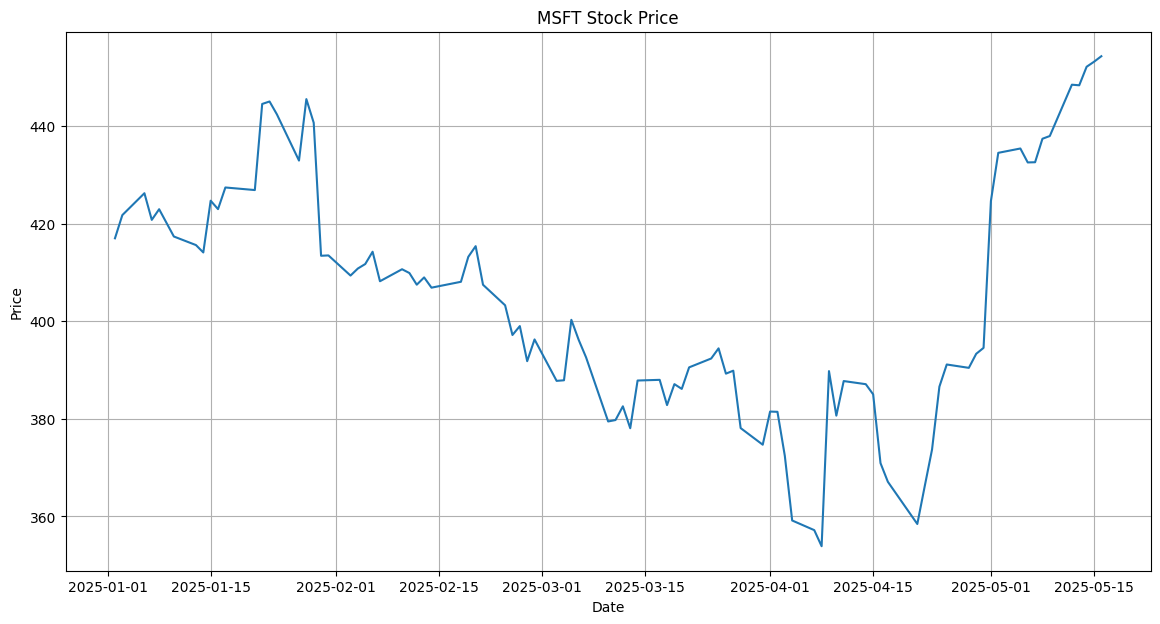

In [4]:
#plot the stock price
plt.figure(figsize=(14, 7))
plt.plot(data['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

## Support and Resistance (แนวรับและแนวต้าน):

- ความหมาย: Support และ Resistance คือระดับราคาที่คาดว่าจะมีการเปลี่ยนแปลงของราคาเกิดขึ้น โดยเป็นบริเวณที่ราคาอาจจะหยุด, กลับตัว, หรือเคลื่อนที่ช้าลง
- Support (แนวรับ):
    - ความหมาย: คือระดับราคาที่คาดว่าจะมีการซื้อเข้ามามากกว่าขาย ทำให้ราคาไม่ลดลงต่ำกว่าระดับนั้น หรือลดลงได้ยาก
    - ลักษณะ: แนวรับมักจะเป็นบริเวณที่มีแรงซื้อรออยู่ ทำให้เมื่อราคาลงมาถึงบริเวณนั้น จะมีคนเข้ามาซื้อเพื่อดันราคาให้สูงขึ้น
    - การใช้งาน: นักลงทุนมักใช้แนวรับเป็นจุดในการเข้าซื้อ เพราะเชื่อว่าราคาจะไม่ลดลงต่ำกว่านั้น หรือหากลดลงก็ไม่มากนัก
- Resistance (แนวต้าน):
    - ความหมาย: คือระดับราคาที่คาดว่าจะมีการขายออกมามากกว่าซื้อ ทำให้ราคาไม่สูงขึ้นไปเกินระดับนั้น หรือสูงขึ้นได้ยาก
    - ลักษณะ: แนวต้านมักจะเป็นบริเวณที่มีแรงขายรออยู่ ทำให้เมื่อราคาขึ้นไปถึงบริเวณนั้น จะมีคนเข้ามาขายเพื่อกดราคาให้ต่ำลง
    - การใช้งาน: นักลงทุนมักใช้แนวต้านเป็นจุดในการขาย เพราะเชื่อว่าราคาจะไม่สูงขึ้นไปกว่านั้น หรือหากสูงขึ้นก็ไม่มากนัก
- วิธีการระบุ Support และ Resistance:

    - Highs and Lows (จุดสูงสุดและจุดต่ำสุด): จุดสูงสุดในอดีต มักจะทำหน้าที่เป็นแนวต้านในอนาคต และจุดต่ำสุดในอดีต มักจะทำหน้าที่เป็นแนวรับในอนาคต
    - Trendlines (เส้นแนวโน้ม): Up Trendline ทำหน้าที่เป็นแนวรับ และ Down Trendline ทำหน้าที่เป็นแนวต้าน
    - Moving Averages (ค่าเฉลี่ยเคลื่อนที่): เส้นค่าเฉลี่ยเคลื่อนที่ (เช่น SMA, EMA) สามารถทำหน้าที่เป็นแนวรับและแนวต้านได้
    - Fibonacci Retracement Levels: ระดับ Fibonacci Retracement สามารถใช้หาระดับแนวรับและแนวต้านที่เป็นไปได้
    - Psychological Levels: ระดับราคาที่เป็นเลขกลม ๆ (เช่น 100, 200, 500) มักจะทำหน้าที่เป็นแนวรับและแนวต้าน เนื่องจากเป็นระดับที่นักลงทุนให้ความสนใจ
- สิ่งที่เกิดขึ้นเมื่อราคา Breakout แนวรับหรือแนวต้าน:

    - Breakout (ทะลุแนวต้าน): เมื่อราคา Breakout (ทะลุ) แนวต้านขึ้นไปได้ แสดงว่าแรงซื้อมีมากกว่าแรงขาย และมีโอกาสที่ราคาจะปรับตัวขึ้นต่อไป โดยแนวต้านเดิม จะเปลี่ยนเป็นแนวรับใหม่
    - Breakdown (หลุดแนวรับ): เมื่อราคา Breakdown (หลุด) แนวรับลงมาได้ แสดงว่าแรงขายมีมากกว่าแรงซื้อ และมีโอกาสที่ราคาจะปรับตัวลงต่อไป โดยแนวรับเดิม จะเปลี่ยนเป็นแนวต้านใหม่

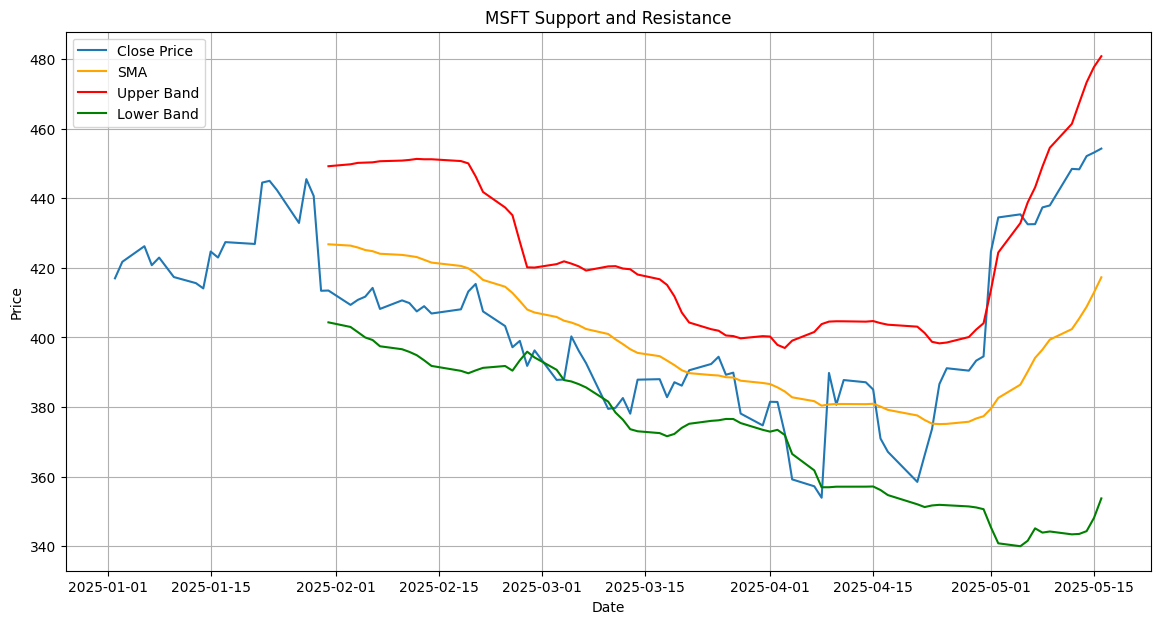

In [5]:
#Support and Resistance
def support_resistance(data, window=20):
    data['SMA'] = data['Close'].rolling(window=window).mean()
    data['Upper_Band'] = data['SMA'] + (data['Close'].rolling(window=window).std() * 2)
    data['Lower_Band'] = data['SMA'] - (data['Close'].rolling(window=window).std() * 2)
    return data

data = support_resistance(data)
#plot the support and resistance
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA'], label='SMA', color='orange')
plt.plot(data['Upper_Band'], label='Upper Band', color='red')
plt.plot(data['Lower_Band'], label='Lower Band', color='green')
plt.title(f'{ticker} Support and Resistance')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Fibonacci Retracement:

- ความหมาย: Fibonacci Retracement เป็นเครื่องมือที่ใช้ในการวิเคราะห์ทางเทคนิค โดยอาศัยลำดับ Fibonacci เพื่อหาระดับแนวรับและแนวต้านที่เป็นไปได้ในตลาด
- ลำดับ Fibonacci: คือลำดับของตัวเลขที่เริ่มต้นด้วย 0 และ 1 โดยตัวเลขถัดไป จะเป็นผลรวมของตัวเลขสองตัวก่อนหน้า (0, 1, 1, 2, 3, 5, 8, 13, 21, 34, ...)
- Fibonacci Ratios (อัตราส่วน Fibonacci): ได้มาจากการหารตัวเลขในลำดับ Fibonacci ด้วยตัวเลขอื่น ๆ ในลำดับเดียวกัน อัตราส่วนที่สำคัญ ได้แก่:
    - 23.6%
    - 38.2%
    - 50% (ไม่ได้มาจากลำดับ Fibonacci โดยตรง แต่เป็นระดับที่นักวิเคราะห์ให้ความสนใจ)
    - 61.8%
    - 78.6% (บางครั้งใช้ 76.4%)
- วิธีการสร้าง Fibonacci Retracement:
    1. ระบุจุดสูงสุด (High) และจุดต่ำสุด (Low) ที่สำคัญในช่วงเวลาที่ต้องการวิเคราะห์
    2. ลากเส้นจากจุดสูงสุดไปยังจุดต่ำสุด (หรือจากจุดต่ำสุดไปยังจุดสูงสุด)
    3. โปรแกรมจะทำการคำนวณและแสดงระดับ Fibonacci Retracement โดยอัตโนมัติ
- การตีความ:
    - ระดับ Fibonacci Retracement ทำหน้าที่เป็นแนวรับและแนวต้าน
    - เมื่อราคาปรับตัวลง (Retrace) จากแนวโน้มขาขึ้น ระดับ Fibonacci Retracement จะเป็นเป้าหมายที่ราคาอาจจะหยุดหรือกลับตัว
    - เมื่อราคาปรับตัวขึ้น (Retrace) จากแนวโน้มขาลง ระดับ Fibonacci Retracement จะเป็นเป้าหมายที่ราคาอาจจะหยุดหรือกลับตัว
- การใช้งาน:
    - หาระดับแนวรับและแนวต้าน
    - ใช้เป็นจุดเข้าซื้อหรือขาย
    - ตั้งจุด Stop Loss และ Take Profit

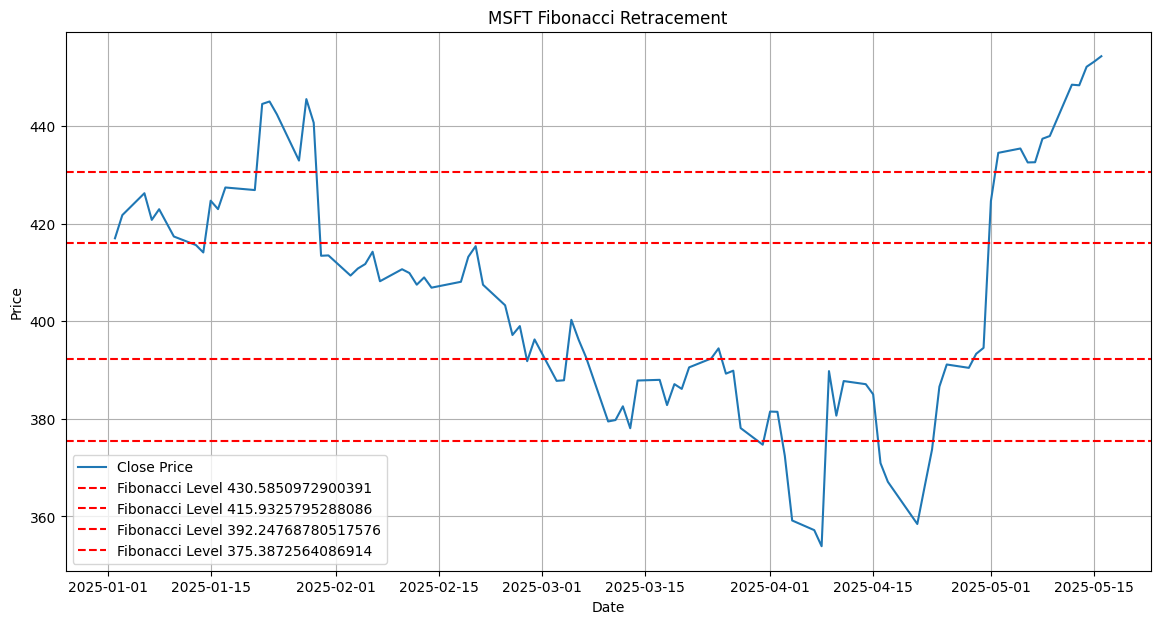

In [6]:
#Fibonacci Retracement
def fibonacci_retracement(data):
    max_price = data['Close'].max()
    min_price = data['Close'].min()
    diff = max_price - min_price
    levels = [max_price - diff * level for level in [0.236, 0.382, 0.618, 0.786]]
    return levels
levels = fibonacci_retracement(data)
#plot the fibonacci retracement
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
for level in levels:
    plt.axhline(y=level, color='red', linestyle='--', label=f'Fibonacci Level {level}')
plt.title(f'{ticker} Fibonacci Retracement')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Trendline (เส้นแนวโน้ม):

- ความหมาย: Trendline คือเส้นที่ลากบนกราฟราคา เพื่อแสดงทิศทางของแนวโน้ม (Trend) ในตลาด
- ประเภท: มี 2 ประเภทหลัก คือ Up Trendline และ Down Trendline


    1. Up Trendline (เส้นแนวโน้มขึ้น):

        - ลักษณะ:
            - เป็นเส้นที่ลากเชื่อมจุดต่ำสุด (Lows) ที่ยกสูงขึ้นเรื่อย ๆ
            - อย่างน้อยต้องมี 2 จุดขึ้นไป ที่เส้น Up Trendline สัมผัส
            - ยิ่งมีจำนวนจุดที่สัมผัสมากเท่าไหร่ เส้น Up Trendline ก็จะยิ่งมีความน่าเชื่อถือมากขึ้น
        - วิธีการลากเส้น:
            - ลากเส้นจากจุดต่ำสุดแรก ไปยังจุดต่ำสุดที่สูงขึ้นถัดไป
            - พยายามให้เส้นสัมผัสกับจุดต่ำสุดให้มากที่สุด
        - การตีความ:
            - Up Trendline แสดงถึงแนวโน้มขาขึ้น (Uptrend)
            - ราคาจะเคลื่อนที่ขึ้นไปตามเส้น Up Trendline
            - Up Trendline ทำหน้าที่เป็นแนวรับ (Support) หากราคาปรับตัวลงมาใกล้เส้น Up Trendline มีโอกาสที่ราคาจะเด้งขึ้น
        - การใช้งาน:
            - ใช้เพื่อยืนยันแนวโน้มขาขึ้น
            - ใช้เป็นแนวรับในการเข้าซื้อ
            - ใช้เป็นจุด Stop Loss หากราคาหลุดออกจาก Up Trendline

    2. Down Trendline (เส้นแนวโน้มลง):

        - ลักษณะ:
            - เป็นเส้นที่ลากเชื่อมจุดสูงสุด (Highs) ที่ลดต่ำลงเรื่อย ๆ
            - อย่างน้อยต้องมี 2 จุดขึ้นไป ที่เส้น Down Trendline สัมผัส
            - ยิ่งมีจำนวนจุดที่สัมผัสมากเท่าไหร่ เส้น Down Trendline ก็จะยิ่งมีความน่าเชื่อถือมากขึ้น
        - วิธีการลากเส้น:
            - ลากเส้นจากจุดสูงสุดแรก ไปยังจุดสูงสุดที่ต่ำลงถัดไป
            - พยายามให้เส้นสัมผัสกับจุดสูงสุดให้มากที่สุด
        - การตีความ:
            - Down Trendline แสดงถึงแนวโน้มขาลง (Downtrend)
            - ราคาจะเคลื่อนที่ลงไปตามเส้น Down Trendline
            - Down Trendline ทำหน้าที่เป็นแนวต้าน (Resistance) หากราคาปรับตัวขึ้นมาใกล้เส้น Down Trendline มีโอกาสที่ราคาจะปรับตัวลง
        - การใช้งาน:
            - ใช้เพื่อยืนยันแนวโน้มขาลง
            - ใช้เป็นแนวต้านในการขาย
            - ใช้เป็นจุด Stop Loss หากราคาหลุดออกจาก Down Trendline

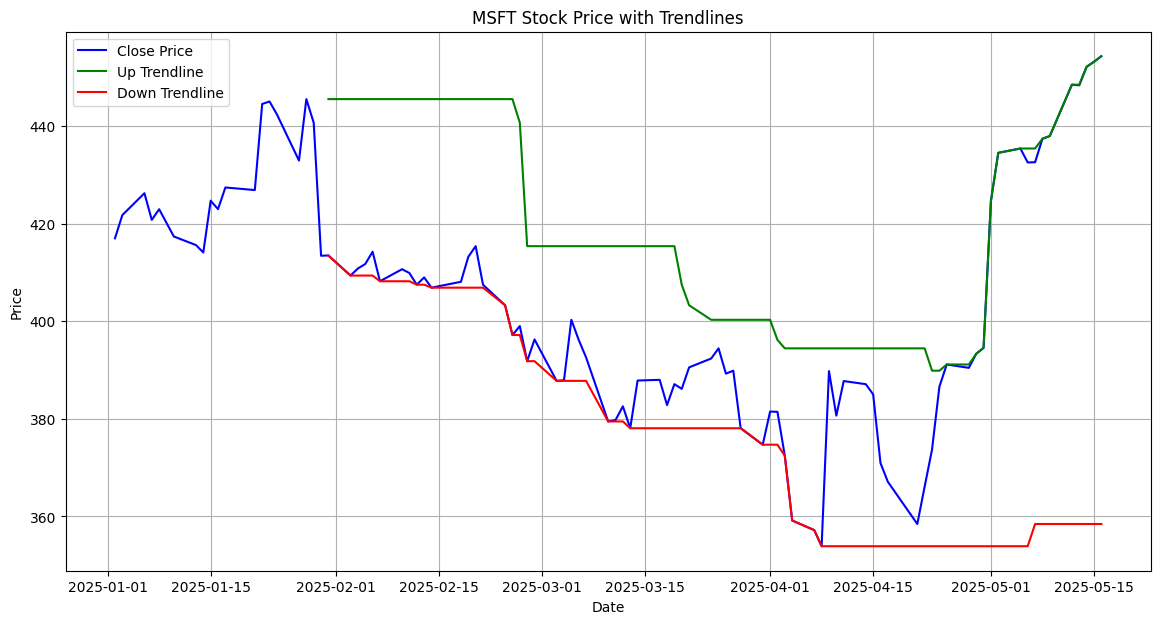

In [7]:
#Up Trendline
def up_trendline(data, window=20):
    data['Up Trendline'] = data['Close'].rolling(window=window).max()
    return data
#Down Trendline
def down_trendline(data, window=20):
    data['Down Trendline'] = data['Close'].rolling(window=window).min()
    return data
data = up_trendline(data)
data = down_trendline(data)

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['Up Trendline'], label='Up Trendline', color='green')
plt.plot(data['Down Trendline'], label='Down Trendline', color='red')
plt.title(f'{ticker} Stock Price with Trendlines')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()
    